### Importing Libraries

In [1]:
from sklearn.datasets import make_classification

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset Generation

In [2]:
X, y = make_classification(n_samples= 100, n_features = 2, n_informative=2, n_redundant = 0, 
                    n_classes=2, n_clusters_per_class = 1, random_state=9, hypercube=False,class_sep=10)

In [3]:
X.shape

(100, 2)

### Data Representation

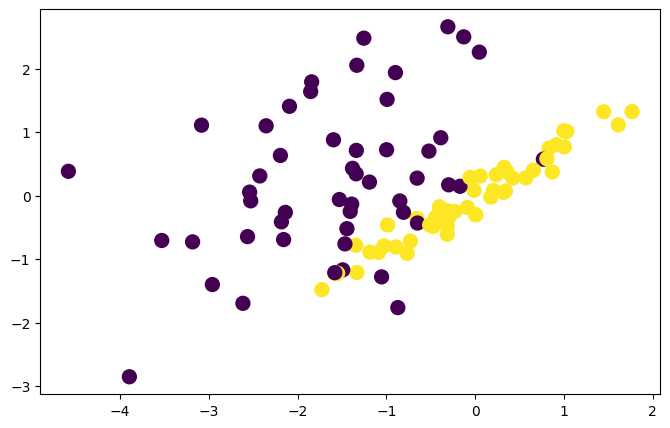

In [4]:
plt.figure(figsize = (8, 5))
plt.scatter(X[:, 0], X[:, 1], c= y, s= 100)
plt.show()

### Logistic Regression from Scratch

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
epochs = 2500
lr = 0.5
no_samples = X.shape[0]

In [7]:
def gradient_descent(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    for i in range(epochs):
        y_pred = sigmoid(np.dot(X, weights)) #y_pred will be a matrix
        weights = weights + lr* np.dot((y - y_pred), X)/no_samples #here we are using dot cause all are matrices
    return weights[0], weights[1:]

In [8]:
intercept1, coefs1 = gradient_descent(X, y)

In [9]:
print(intercept1, " ", coefs1)

2.104926297942857   [ 3.82212346 -3.21937035]


In [10]:
m1 = - (coefs1[0]/coefs1[1])
b1 = - (intercept1/coefs1[1])

In [11]:
x1_input = np.linspace(-3, 3, 100)
y1_input = m1 * x1_input + b1

### Logistic Regression from Sklearn

In [12]:
classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

In [13]:
intercept2 = classifier.intercept_
coefs2 = classifier.coef_

In [14]:
print(intercept2, " ", coefs2)

[1.61146319]   [[ 2.35488634 -1.64069681]]


In [15]:
m2 = - (coefs2[0][0]/coefs2[0][1])
b2 = - (intercept2/coefs2[0][1])

In [16]:
x2_input = np.linspace(-3, 3, 100)
y2_input = m2 * x2_input + b1

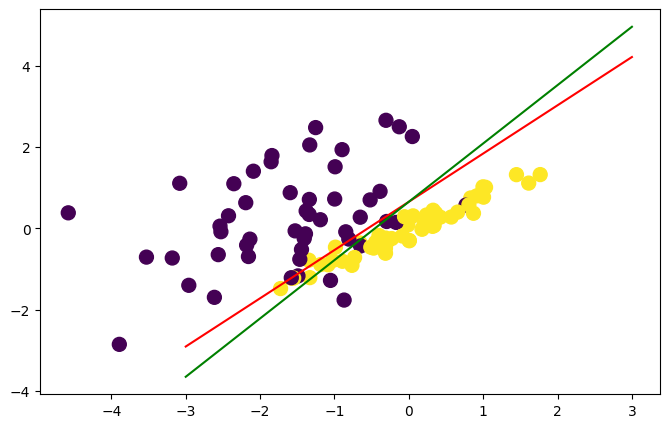

In [17]:
plt.figure(figsize = (8, 5))
plt.plot(x1_input, y1_input, c = 'r') #logistic regression from scratch
plt.plot(x2_input, y2_input, c = 'g') #logistic regression from sklearn
plt.scatter(X[:, 0], X[:, 1], c= y, s= 100)
plt.show()